In [260]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import sympy
from sympy import init_printing
init_printing(use_latex=True)

In [261]:
up = np.array([1, 0])
down = np.array([0, 1])
I = np.array([[1, 0],[0, 1]])
s_x = np.array([[0, 1],[1, 0]])
s_y = np.array([[0, -1j],[1j, 0]])
s_z = np.array([[1, 0],[0, -1]])

s_p = s_x + 1j*s_y
s_m = s_x - 1j*s_y

zz = np.kron(s_z,s_z)

In [262]:
def mag_z(N):
    mz = 0
    for i in range(N):
        mz = mz + (1./N)*np.kron(np.eye(2**i),np.kron(s_z,np.eye(2**(N-i-1))))
    return(mz)

In [277]:
def m_z_pl(N,o):
    mz = 0
    for i in range(int(N/2)):
        mz = mz + (2./N)*np.kron(np.eye(2**i),np.kron(o,np.eye(2**(N-i-2))))
    return(mz)

In [264]:
def h_tfim(j,g,N):
    H = -j*zz + g*(np.kron(s_x,I) + np.kron(I,s_x)) #- 1e-3*(np.kron(s_z,I) + np.kron(I,s_z))
    for i in range(3,N+1):
        H = np.kron(H,I) -j*np.kron(np.eye(2**(i-2)),zz) + g*np.kron(np.eye(2**(i-1)),s_x) #- 1e-3*np.kron(np.eye(2**(i-1)),s_z) 
    #H = H - j*np.kron(s_z,np.kron(np.eye(2**(N-2)),s_z))
    return H

In [265]:
zzzz = np.kron(s_z,np.kron(s_z,np.kron(s_z,s_z)))
I2 = np.eye(2**2)
I3 = np.eye(2**3)
def h_pl(j,g,N):
    H = -j*zzzz + g*(np.kron(s_x,I3) + np.kron(I,np.kron(s_x,I2)) + np.kron(I2,np.kron(s_x,I)) + np.kron(I3,s_x)) #- 1e-3*(np.kron(s_z,I3) + np.kron(I,np.kron(s_z,I2)) + np.kron(I2,np.kron(s_z,I)) + np.kron(I3,s_z))
    for i in range(6,N+1,2):
        H = np.kron(H,I2) - j*np.kron(np.eye(2**(i-4)),zzzz) + g*(np.kron(np.eye(2**(i-2)),np.kron(s_x,I)) + np.kron(np.eye(2**(i-2)),np.kron(I,s_x))) #- 1e-3*(np.kron(np.eye(2**(i-2)),np.kron(s_z,I)) + np.kron(np.eye(2**(i-2)),np.kron(I,s_z)))
    #H = H - j*np.kron(zz,np.kron(np.eye(2**(N-4)),zz))
    return H

In [266]:
j = 1
g = 1
N = 10
grid = 50
h = np.linspace(0,1,grid)
En = np.zeros((3,grid))
mz = np.zeros((3,grid))
for i in range(6,N+1,2):
    for k in range(grid):
        ham = h_pl(j,h[k],i)
        e, v = la.eigh(ham)
        En[int(i/2)-3,k] = e[1] - e[0]
        mz[int(i/2)-3,k] = np.dot(np.conjugate(v[:,0]).T,np.dot(mag_z(i),v[:,0]))

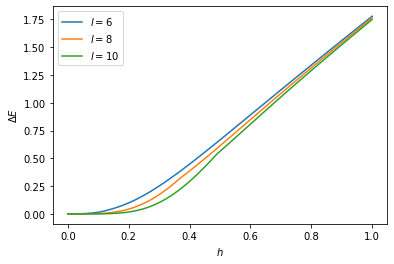

In [267]:
for i in range(3):
    plt.plot(h,En[i,:],label = r"$l=%d$" %(2*i+6))
plt.xlabel(r"$h$")
plt.ylabel(r"$\Delta E$")
plt.legend()
#plt.savefig('pl_ising_1.pdf')
plt.show()

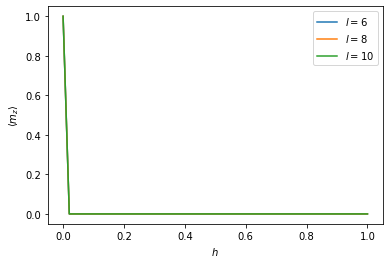

In [268]:
for i in range(3):
    plt.plot(h,mz[i,:],label = "$l=%d$" %(2*i+6))
plt.xlabel(r"$h$")
plt.ylabel(r"$\langle m_z \rangle$")
plt.legend()
#plt.savefig('pl_mz_fbc_2.pdf')
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

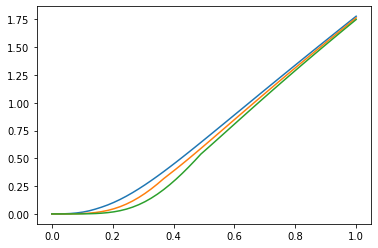

In [257]:
for i in range(2**N):
    plt.plot(h,En[:,i])
plt.xlabel(r"$h$")
plt.ylabel(r"$\Delta E$")
#plt.legend()
#plt.savefig('pl_is_all_fbc.pdf')
plt.show()

In [269]:
S_z = np.kron(s_z,s_z)
S_x = np.kron(s_x,I) #s_x
T_x = np.kron(s_x,s_x)

def h_pl_per(j,d1,d2,N):
    H = -j*np.kron(S_z,S_z) + d1*(np.kron(S_x,I2) + np.kron(I2,S_x)) + d2*(np.dot(np.kron(S_x,I2),np.kron(T_x,I2)) + np.dot(np.kron(I2,S_x),np.kron(I2,T_x)))
    for i in range(6,N+1,2):
        H = np.kron(H,I2) - j*np.kron(np.eye(2**(i-4)),np.kron(S_z,S_z)) + d1*(np.kron(np.eye(2**(i-2)),S_x)) + d2*(np.dot(np.kron(np.eye(2**(i-2)),S_x),np.kron(np.eye(2**(i-2)),T_x)))
    #H = H - j*np.kron(S_z,np.kron(np.eye(2**(N-4)),S_z))
    return H

In [270]:
def T_X(N):
    tx = 0
    for i in range(0,N,2):
        tx = tx + np.kron(np.eye(2**i),np.kron(T_x,np.eye(2**(N-i-2))))
    return(tx)

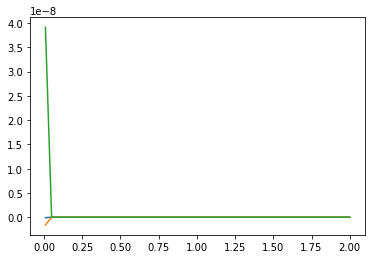

In [278]:
N = 10
grid = 50
j = 1 #np.linspace(0.01,2,grid)
d1,d2 = [np.linspace(0.01,2,grid)]*2
En = np.zeros((3,grid))
tx = np.zeros((3,grid))
mz = np.zeros((3,grid))

#sum_tx = T_X(N)
for i in range(6,N+1,2):
    sum_tx = T_X(i)
    for k in range(grid):
        e, v = la.eigh(h_pl_per(j,d1[k],d2[k],i))
        #En[int(i/2)-3,k] = e[1] - e[0]
        mz[int(i/2)-3,k] = np.dot(np.conjugate(v[:,0]).T,np.dot(m_z_pl(i,S_z),v[:,0]))
        #tx[int(i/2)-3,k] = np.dot(np.conjugate(v[:,0]).T,np.dot(sum_tx,v[:,0]))

for i in range(3):
    #plt.plot(d1,En[i,:])
    #plt.plot(d1,tx[i,:])
    plt.plot(d1,mz[i,:])
plt.show()
    

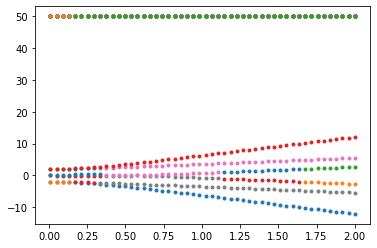

In [235]:
N = 6
grid = 50
j = 1 #np.linspace(0.01,2,grid)
d1,d2 = [np.linspace(0.01,2,grid)]*2
E = np.zeros((2**N,grid))
tx = np.zeros((2**N,grid))
sum_tx = T_X(N)
for k in range(grid):
    ham = h_pl_per(j,d1[k],d2[k],N)
    e, v = la.eigh(ham)
    #En[k] = e[1] - e[0]
    for i in range(e.shape[0]):
        tx[i,k] = np.dot(np.conjugate(v[:,i]).T,np.dot(sum_tx,v[:,i]))
        if(np.allclose(tx[i,k],3)):
            E[i,k] = np.dot(np.conjugate(v[:,i]).T,np.dot(ham,v[:,i]))
        else:
            E[i,k] = 50

for i in range(2**N):
    plt.plot(d1,E[i,:],".")
    #plt.plot(d1,tx[i,:],".")
plt.show()

In [171]:
def cus_sort(e,v,tx):
    dic = {}
    for i in range(e.shape[0]):
        dic[i] = (e[i],v[:,i],tx[i])
    for i in range(e.shape[0]):
        for j in range(i+1,e.shape[0]):
            if(dic[i][2] > dic[j][2]):
                temp = 1*dic[i]
                dic[i] = 1*dic[j]
                dic[j] = temp
    return (dic)
            

In [172]:
for i in range(grid):
    lol = cus_sort(e,v,tx[:,1])

In [ ]:
plt.plot()

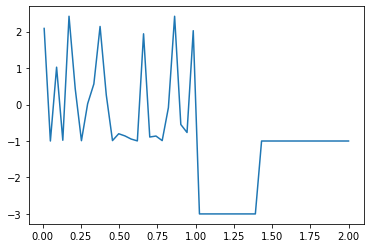

In [170]:
plt.plot(d1,tx[45,:])
plt.show()


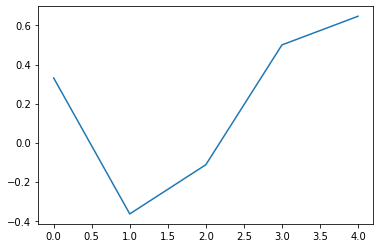

In [149]:
N = 10
#grid = 50
j = 1 #np.linspace(0.01,2,grid)
d1,d2 = 2,2 #[np.linspace(0.01,2,grid)]*2
#tx = np.zeros((2**N,int(N/2)))
tx = np.zeros((int(N/2)))
e, v = la.eigh(h_pl_per(j,d1,d2,N))
#for k in range(e.shape[0]):
for i in range(0,N,2):
    tx[int(i/2)] = np.dot(np.conjugate(v[:,1]).T,np.dot(np.kron(np.eye(2**i),np.kron(T_x,np.eye(2**(N-i-2)))),v[:,1]))

plt.plot(np.arange(int(N/2)),tx)
plt.show()

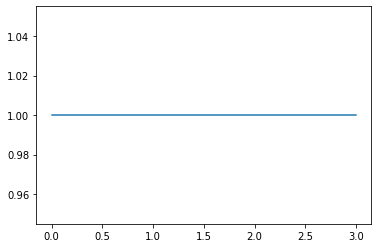

In [125]:
plt.plot(np.arange(int(N/2)),tx[0,:])
plt.show()

In [146]:
tx

array([0.6243279 , 0.67542622, 0.5765568 , 0.47920089, 0.64448819])

In [147]:
np.sum(tx)

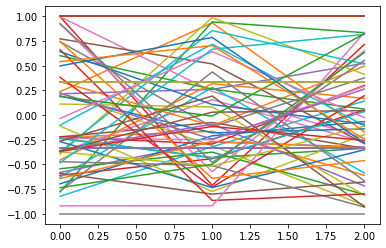

In [151]:
N = 6
#grid = 50
j = 1 #np.linspace(0.01,2,grid)
d1,d2 = 2,2 #[np.linspace(0.01,2,grid)]*2
tx = np.zeros((2**N,int(N/2)))
e, v = la.eigh(h_pl_per(j,d1,d2,N))
for k in range(e.shape[0]):
    for i in range(0,N,2):
        tx[k,int(i/2)] = np.dot(np.conjugate(v[:,k]).T,np.dot(np.kron(np.eye(2**i),np.kron(T_x,np.eye(2**(N-i-2)))),v[:,k]))

for i in range(2**N):
    plt.plot(np.arange(int(N/2)),tx[i,:])
plt.show()